In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="white", color_codes=True)
import numpy as np
import math
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.__version__


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

<center>**This is where I import my dataset**</center>
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQTSWee_aIGw5TaBPFYIe5qLvrRocU8DajWhuN2l656u7w7STcX)

In [2]:
ramen = pd.read_csv('../input/ramen-ratings.csv')
ramen.info()

<center>**This is where I wanted to view my columns in the dataset**</center>
![](https://wishihadthat.com/images/assets/full-columns.jpg)

In [3]:
#this is to view the columns in the dataset
ramen.columns

<center>**This is where I show the first 20 lines and the last 20 lines of the dataset**</center>
![](http://2.bp.blogspot.com/_N6SF67pTIXg/SvyWUNi-l2I/AAAAAAAAFH8/SDrOHvjiyBs/s1600/DSC07798.JPG)

In [4]:
# this is to show the first 20 lines of the dataset
ramen.head(20)

In [5]:
# this shows the last 20 lines of the dataset
ramen.tail(20)

<center>**This is where I found the values for the columns, I have no clue what it means ... but here we are**</center>
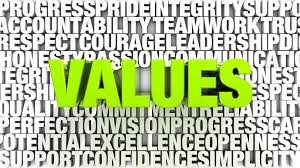

In [6]:
columns = ramen.columns.values
for col in columns:
    number = ramen[col].count()
    print(col, number/len(ramen), number)

<center>**My Data Type is Ramen ... I thought 'What a great Idea it is to choose food for a dataset' NOPE**</center>
![](https://media1.tenor.com/images/3fe0f068821a9baec3b1991b4c3cee35/tenor.gif?itemid=4576355)

In [7]:
# data types
ramen.dtypes
ramen['Stars'] = pd.to_numeric(ramen['Stars'], errors='coerce')
ramen.dtypes

<center>**This is where Ramen gets grouped by country ... NO I don't mean country music ... nobody likes country music ... listening to country music is like listening to an Ibis rummage through trash thinking that there's a doughnut inside ... No Ibis ... nobody throws away doughnuts**</center>
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT_Wd_szpJI8hjCXXH0vV68G9Jo08ZC-qHRLi2K8EmO_58UlndZ)

In [8]:
gb_country = ramen.groupby('Country')
median_stars = gb_country['Stars'].median().sort_values(ascending = False)

number_per_country = gb_country.count()
print(number_per_country)

<center>**This is where I really started to shine so I started grouping things I thought would be cool ... and then the slow realisation of stupidity set in as I realised that I cannot code to save my life. Coding to me is like hearing someone scratch their nails on a chalkboard.</center>
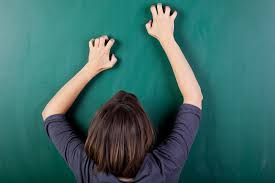

In [9]:
gb_country['Stars'].unique()

In [10]:
gb_country['Style'].unique()

<center>**I feel like this is the moment I realised that I had to group something meaningful or significant ... SO ... I grouped the Ramen by Brand and Star rating.</center>
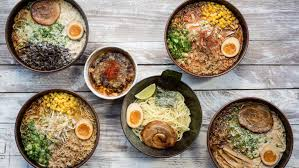

In [11]:
gb_brand = ramen.groupby('Brand')
gb_brand['Stars'].describe()

<center>**This is where I realised that there are so many types of Ramen ... I thought it was just the three main ones Chicken, Beef and Pork ... turns out there's fake Chicken, Fake Pork and other stuff that makes your hair fall out. Then I went on a tangent in my head thinking about all the times I might have ate ramen that had an ingredient to make my hair fall out ... then after my adventure in my head I realised that I was just unlucky ... but I've been told I got heart so I guess that's good right
¯\_(ツ)_/¯**</center>

In [12]:
ramen['Variety'].value_counts()

<center>**I added these pictures after I did the code thingy ... BUT ... this is the moment that I realised that this entire dataset was about INSTANT RAMEN ... not real ramen ... instant crapmen ... It makes me mad! Anything instant makes me mad or places me in a perpetual state of wanting to vomit or smash my head against the nearest politician. People love instant everything ... Oh they looked my way, they must love me ... the just add water relationship. Although I do feel that way whenever a dog looks at me.**</center>
![](https://yschoo.files.wordpress.com/2013/10/photo-16-001.jpg)

In [22]:
plt.figure(figsize=(20,10))
ramen['Style'].value_counts().plot(kind='bar')
plt.xlabel("Style")
plt.ylabel("Review")
plt.title('Ramen Ratings')

<center>**What's interesting to see is the amount of stars Pack Ramen gets. It's pack ramen ffs ... Dear Louie where does this hate come from ... well I once had to eat pack ramen from a vending machine for a year because I was an idiot about the money I had and blew that all on good times and fast friends. The things we do when we lose our minds.**</center>
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTIdlcLaWMHehz0T2sQHku4f4xGRqEOg_AS6mTacqgu_xS3qht9rQ)

In [15]:
columns_of_interest = ['Variety', 'Stars']
two_columns_of_data = ramen[columns_of_interest]
two_columns_of_data.describe()

In [16]:
ramen['Stars'].value_counts().plot.area()

<center>**The above line graph is my favourite out of this whole thing ... it used to be a line ... then when I went to run the code it did a thing and gave me errors ... so being me I decided to delete that part of the code and now we have a line that looks like it ingested LSD while trying to climb a mountain. Kids, don't do drugs and stay in school ... BUT ... if you decide that it's ok for you then just do it in moderation and not when you're in some remote field in the middle of nowhere wondering how you got there, you have no battery left on your phone and you're missing a shoelace.**</center>
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSFTOwAmyPpfkCySmW7ia00gHf-Mj7RPsYGlwhQVvCe2Xx_Q2AR)

In [18]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(ramen.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

<center>**This is a heatmap of my dataset ... it makes no effin sense to me. Garden gnomes make no sense to me. They just stand there holding a rake or some garden shears. It's 9am and I go to check on the garden and what do you think I find, a Lawn that hasn't been mowed, plants that haven't been pruned and a garden gnome standing there holding a rake with a fake smile plastered on its face. David the gnome was all a lie just like the tooth fairy, Santa Clause and FAKE RAMEN FLAVOURS.**</center>
![](https://i.ytimg.com/vi/yO8qMN2GKVQ/hqdefault.jpg)

<center>**This concludes my dataset presentation ... I've had so much fun pretending I know how to proper code. For those of you who love Instant Ramen ... life will play games with you so make better life choices.**</center>
![](http://lucindapollit.com/wp-content/uploads/2013/02/Sign-making-better-choices.jpg)